###  K-평균 알고리즘


- 군집화에서 가장 일반적으로 사용되는 알고리즘  
- 특정 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법


- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
    - 반복 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 군집을 선택할지 가이드하기 어려움

#### k-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=['sepal_lenth','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_lenth,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
iris_df['cluster'] = kmeans.labels_

In [5]:
iris_df['target'] = iris.target

iris_df.groupby(['target','cluster'])['sepal_lenth'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_lenth, dtype: int64

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

iris_df['pca_x'] = iris_pca[:,0]
iris_df['pca_y'] = iris_pca[:,1]

iris_df.head()

,sepal_lenth,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


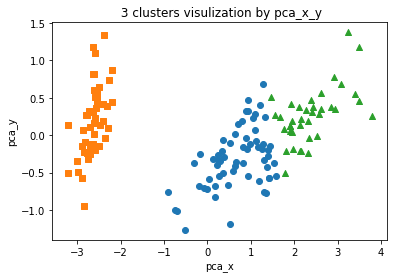

In [7]:
marker0_ind = iris_df[iris_df['cluster'] == 0].index
marker1_ind = iris_df[iris_df['cluster'] == 1].index
marker2_ind = iris_df[iris_df['cluster'] == 2].index

plt.scatter(x = iris_df.loc[marker0_ind, 'pca_x'], y = iris_df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = iris_df.loc[marker1_ind, 'pca_x'], y = iris_df.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x = iris_df.loc[marker2_ind, 'pca_x'], y = iris_df.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title(' 3 clusters visulization by pca_x_y')
plt.show()

#### clustering 알고리즘 테스트를 위한 데이터 생성

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- n_samples : 생성할 총 데이터의 개수
- n_features : 데이터으 ㅣ피처 개수, 시각화를 목표로 할 경우 2개로 설정해 첫 번째 피처는 X좌표, 두 번째 피처는 Y좌표에 표현
- centers : 군집의 개수, ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미
- cluster_std : 생성될 군집 데이터의 표준 편차

In [10]:
import pandas as pd

cluster_df = pd.DataFrame(X, columns=['ftr_1','ftr_2'])
cluster_df['target'] = y
cluster_df.head()

,ftr_1,ftr_2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


##### make_blob()으로 만들어진 데이터 포인트들을 시각화

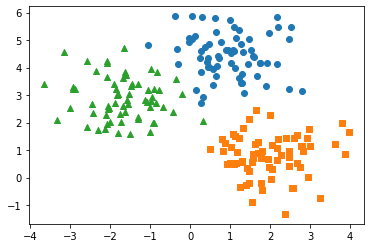

In [11]:
target_list = np.unique(y)

markers = ['o','s','^']

for i in target_list:
    target_cluster = cluster_df[cluster_df['target'] == i]
    plt.scatter(x = target_cluster['ftr_1'], y = target_cluster['ftr_2'],marker=markers[i])
    
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels 
cluster_df

,ftr_1,ftr_2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


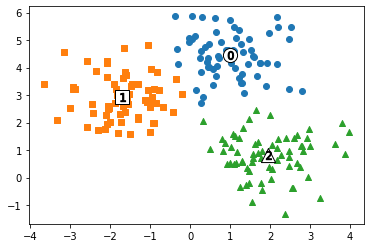

In [13]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^']

for i in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == i]
    x_y_center = centers[i]
    plt.scatter(x = label_cluster['ftr_1'], y = label_cluster['ftr_2'],marker = markers[i])
    plt.scatter(x = x_y_center[0], y = x_y_center[1], s = 200, color = 'white', edgecolor= 'k', marker= markers[i])
    plt.scatter(x = x_y_center[0], y = x_y_center[1], s = 70, color = 'black', edgecolor = 'k', marker='$%d$' % i)
plt.show()

In [14]:
cluster_df

,ftr_1,ftr_2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [15]:
cluster_df.groupby(['target'])['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

### 군집 평가

붓꽃 데이터 세트의 경우 타깃 레이블이 존재했지만, 대부분의 군집화 데이터 세트는 타깃 레이블이 없습니다. 따라서 군집화의 성능을 평가하는 방법이 필요한데 대표적인 방법이 실루엣 분석입니다.

#### 실루엣 분석

실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냅니다. 효율적이란 다른 군집과의 거리는 떨어져 있으며 동일군집기리의 데이터는 서로 가깝게 뭉쳐 있다는 의미입니다.

실루엣 계수를 기반으로 하며, 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표입니다.
- 좋은 군집화의 조건
    - 실루엣 계수의 평균값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋습니다.
    - 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 합니다.

#### 붗꽃 데이터 셋을 이용한 군집 평가

In [16]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

iris_df['cluster'] = kmeans.labels_

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
score_sample = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouette_coeff'] = score_sample
print('silhouette_samples( ) retuen 값의 shape', score_sample.shape)
iris_df.head()

silhouette_samples( ) retuen 값의 shape (150,)


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [19]:
average_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터셋 실수엣 계수 값의 평균 : {0:.3f}'. format(average_score))

붓꽃 데이터셋 실수엣 계수 값의 평균 : 0.553


In [20]:
iris_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

#### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

### 평균 이동

- 평균 이동은 k-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행
- k-평균은 중심을 중심에 소속된 데이터의 평균 거리 중심으로 이동  

- 평균 이동은 특정 대역폭안에서 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시키 것이 차이 존재 
    - 대역폭 크기에 따라 최적의 군집 개수를 정하기 때문에, 대역폭 크기의 설정으로 군집화의 품질 결정  
    
- 평균 이동에서는 확률 밀도 함수를 이용. 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하는데, 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE( kernel density estimation ) 을 이용

- 군집화 수행 과정 
    - 1) 초기 군집 중심점과 대역폭 설정
    - 2) 대역폭 내에 데이터 밀도가 높은 곳으로 중심점 이동
    - 3) 이동한 중심점에서 대역폭 내의 데이터 밀도 측정
    - 4) 대역폭 내의 데이터 밀도가 높은 곳으로 중심점 이동
    - 5) 지속적으로 반복하여 가장 데이터 밀도가 높은 peak 지점을 기준으로 군집화 수행
    - 6) peak 지점 찾으면 수행 중지

- 평균 이동 장점
    - 유연한 군집화가 가능
    - 이상치의 영향력이 크지 않음
    - 군집의 개수를 정할 필요가 없음
- 평균 이동 단점
    - 알고리즘 수행 시간이 오래 걸림
    - bandwidth의 크기에 따른 군집화 영향도가 매우 큼

In [21]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs( n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print(' cluster labels 유형:',np.unique(cluster_labels))

 cluster labels 유형: [0 1 2 3 4 5 6 7]


In [22]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(' cluster labels 유형:',np.unique(cluster_labels))

 cluster labels 유형: [0 1 2]


- 8개의 군집이 3개의 군집으로 군집화. 
- 데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 영향을 주기때문에   
bandwidth를 최적화 값으로 설정하는 것이 중요.
- 사이킷런은 최적화된 bandwidth값을 찾기 위해서 estimate_bandwidth( )를 제공. 
- estimate_bandwidth( ) 파라미터로 피처 데이터 세트를 입력

In [23]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile = 0.2)
print('bandwidth 값 : ', round(bandwidth,3))

bandwidth 값 :  1.444


In [24]:
import pandas as pd

cluster_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

In [25]:
best_bandwidth = estimate_bandwidth(X, quantile=0.2)

In [26]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :', np.unique(cluster_labels))

cluster labels 유형 : [0 1 2]


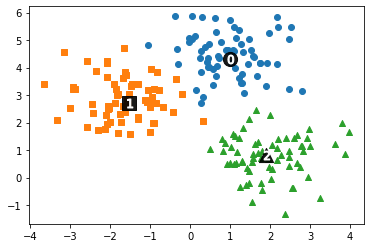

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], marker=markers[label])

    plt.scatter(x  = center_x_y[0], y = center_x_y[1], color = 'black', s = 200, alpha=0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], color = 'white', s = 80, marker='$%d$' % label)
plt.show()

In [28]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64


### GMM ( GAUSSIAN MIXTURE MODEL )

- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주 ( 가우시안 분포란 좌우 대칭형의 종 형태를 가진 연속 확률 함수 )
- 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식
- 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식

In [29]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data, columns=feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

iris_df['gmm_cluster'] = gmm_cluster_labels
print(iris_df.groupby('target')['gmm_cluster'].value_counts())

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


#### 클러스터링 결과 시각화 함수

In [31]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
            
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

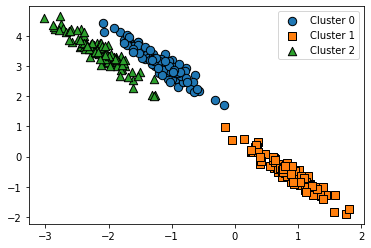

In [32]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=300, centers = 3, cluster_std=0.5, random_state=0)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_trans = np.dot(X, transformation)
cluster_df = pd.DataFrame(X_trans, columns=['ftr1','ftr2'])
cluster_df['target'] = y
visualize_cluster_plot(None, cluster_df,'target',iscenter=False)

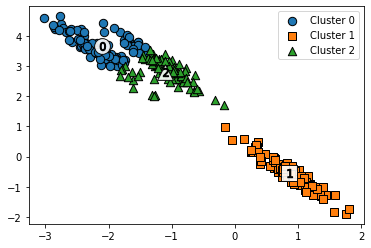

In [33]:
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_trans)
cluster_df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, cluster_df,'kmeans_label',iscenter=True)

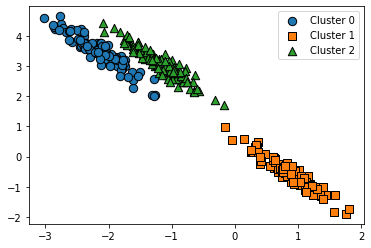

In [34]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit(X_trans).predict(X_trans)
cluster_df['gmm_labels'] = gmm_labels 

visualize_cluster_plot(gmm, cluster_df, 'gmm_labels',iscenter=False)

In [35]:
print("############ kmeans와 gmm의 군집 결과 비교 ###########")
print(cluster_df.groupby('target')['kmeans_label'].value_counts())
print("--------------------------------------------------------")
print(cluster_df.groupby('target')['gmm_labels'].value_counts())

############ kmeans와 gmm의 군집 결과 비교 ###########
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64
--------------------------------------------------------
target  gmm_labels
0       2             100
1       1             100
2       0             100
Name: gmm_labels, dtype: int64


### DBSCAN

- 간단하고 직관적인 알고리즘
- 특정 공간 내에 데이터 밀도 차이를 기반으로 하는 알고리즘으로 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행

- 주요 파라미터
    - 입실론 주변 영역 : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
    - 최소 데이타 개수 : 개별 데이터의 입실론에 포함되는 타 데이터의 개수
         - 핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 
         - 이웃 포인트 : 주변 영역 내에 위치한 타 데이터
         - 경계 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인틀 이웃 포인트로 가지고 있는 경우
         - 잡음 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며 핵심 포인트도 이웃 포인트로 가지고 있는 않는 경우

- 주요 초기화 파라미터
    - eps : 입실론 주변 영역의 반경을 의미
    - min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미 ( 자신의 데이터를 포함, 최소 데이터 개수 +1 )

In [41]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data= iris.data, columns = feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_labels'] = dbscan_labels

iris_df.groupby('target')['dbscan_labels'].value_counts()

target  dbscan_labels
0        0               49
        -1                1
1        1               46
        -1                4
2        1               42
        -1                8
Name: dbscan_labels, dtype: int64

- 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미합니다. 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화
- DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미합니다

In [44]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

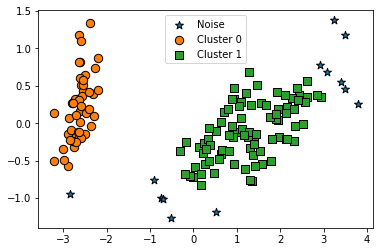

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_trans = pca.fit_transform(iris.data)
iris_df['ftr1'] = pca_trans[:, 0]
iris_df['ftr2'] = pca_trans[:, 1]

visualize_cluster_plot(dbscan, iris_df,'dbscan_labels', iscenter=False)